# Treino MLP no Scikit e Métricas de Desempenho
## Grupo 2 - Trabalho de Conclusão de Curso
### - Bruno Uchôa Brandão e Silva - 12412440
### - Rayan Luz Ralile - 12412502

===============================================================================

### Passo 1: carregamento das bibliotecas usadas no programa

In [14]:
import numpy as np
import scipy.signal
import librosa
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder

### Passo 2: construção das funções auxiliares

In [15]:
# Funções de salvar e carregar objetos diversos - otimizar os passos de tratamento do dataset e treino
def salva_objeto(obj, file_path = "data.pickle"):
    with open(file_path, 'wb') as file:
        pickle.dump(obj, file)
        
def carrega_objeto(file_path = "data.pickle"):
    with open(file_path, 'rb') as file:
        obj = pickle.load(file)
    return obj

### Passo 3: leitura do dataset com as labels do Scikit-learn

In [16]:
dataset = carrega_objeto("dataset.pickle")
labels = carrega_objeto("labels_scikit.pickle")

### Passo 4: Separação do conjunto treino e teste

In [17]:
# Carregar o conjunto de dados e os rótulos (labels)

# Normalizar o conjunto de dados - já feito no DataPrep
normalized_data = dataset

# Dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(normalized_data, labels, test_size=0.2, random_state=42)

### Passo 5: cria e compila o modelo MLP do Scikit-learn com o hiperparâmetro 'learning_rate' definido através de ensaios anteriores e arquitetura de uma camada oculta com 800 neurônios conforme descrito no TCC

In [18]:
# Definir Perceptron Multicamadas (MLP) com parâmetros específicos
mlp = MLPClassifier(hidden_layer_sizes=(800,), activation='relu', solver='adam', learning_rate_init=0.01)

### Passo 6: treina a MLP com o Scikit-learn e realiza métrica inicial de desempenho

In [19]:
# Treinar MLP
mlp.fit(X_train, y_train)

# Comando abaixo traça a curva de perda. É uma operação custosa de recursos e tempo
# training_loss = mlp.loss_curve_

# Avaliar a MLP
print('Acurácia de treino:', mlp.score(X_train, y_train))
print('Acurácia de teste', mlp.score(X_test, y_test))

Acurácia de treino: 0.9933114035087719
Acurácia de teste 0.987719298245614


### Passo 7: salvar a rede treinada para uso posterior na ferramenta

In [20]:
salva_objeto(mlp,"scikitmlp.pkl")

### Passo 8: construir curva de aprendizagem
### 8.1: construir e salvar os parâmetros - processo demorado

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(mlp, X_train, y_train, cv=5,
                                                      train_sizes=np.linspace(0.1, 1.0, 10))

salva_objeto(train_sizes,"train_sizes2.pkl")
salva_objeto(train_scores,"train_scores2.pkl")
salva_objeto(val_scores,"val_scores2.pkl")

### 8.2: para poupar tempo e processamento, carregue diretamente os arquivos previamente criados

In [8]:
train_sizes = carrega_objeto("train_sizes2.pkl")
train_scores = carrega_objeto("train_scores2.pkl")
val_scores = carrega_objeto("val_scores2.pkl")

### 8.3: cálculos de médias e desvios padrões dos scores obtidos

In [9]:
# Calcular a média dos scores de treinamento ao longo das iterações
train_scores_mean = np.mean(train_scores, axis=1)

# Calcular o desvio padrão dos scores de treinamento ao longo das iterações
train_scores_std = np.std(train_scores, axis=1)

# Calcular a média dos scores de validação ao longo das iterações
val_scores_mean = np.mean(val_scores, axis=1)

# Calcular o desvio padrão dos scores de validação ao longo das iterações
val_scores_std = np.std(val_scores, axis=1)

### 8.4: plota a curva de aprendizagem

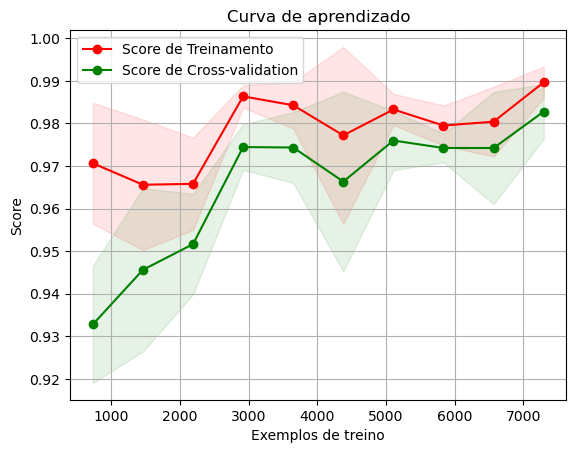

In [10]:
plt.figure()
plt.title('Curva de aprendizado')
plt.xlabel('Exemplos de treino')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Score de Treinamento')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Score de Cross-validation')
plt.legend(loc='best')


plt.savefig('curva_aprendizagem.svg')


plt.show()

### Regras para verificar a condição do modelo

* Se o modelo puder se beneficiar de mais dados (se a pontuação de validação estiver aumentando à medida que a quantidade de dados aumenta).

* Se o modelo estiver superajustado (se houver uma lacuna significativa entre as pontuações de treinamento e validação).

* Se o modelo estiver subajustado (se ambas as pontuações forem baixas).

### Passo 9: caso tenha executado a curva de perda, trecho abaixo promove seu plot

In [ ]:
plt.plot(mlp.loss_curve_)
plt.title('Perdas do modelo')
plt.ylabel('perda')
plt.xlabel('[iteração] - épocas')
plt.legend(['treino'], loc='upper left')
plt.show()

### Passo 10: matriz confusão do MLP treinado - cálculo e plot

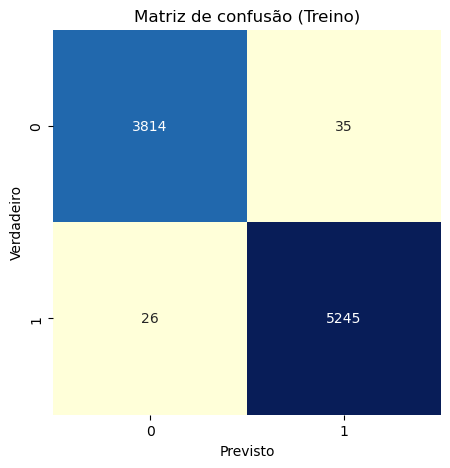

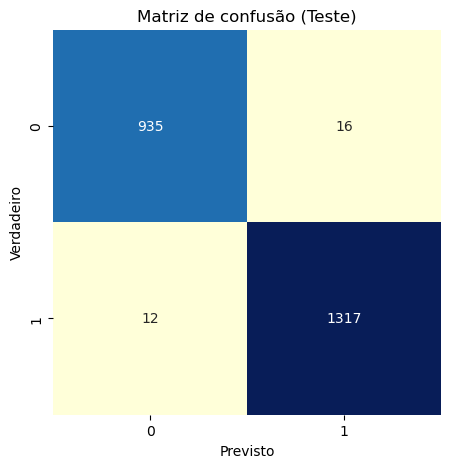

In [21]:
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

# Computar matrizes de confusão
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Função para plotagem amigável da matriz de confusão
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
    plt.title(title)
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.show()

plot_confusion_matrix(cm_train, 'Matriz de confusão (Treino)')
plot_confusion_matrix(cm_test, 'Matriz de confusão (Teste)')

### Passo 11: visualização mais robusta, com o uso do Pandas

In [22]:
# Inicializar o LabelEncoder
le = LabelEncoder()

# Ajustar o LabelEncoder aos rótulos e transformá-los (codificar)
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Obter os nomes das classes dos rótulos
labels = le.classes_

# Calcular o total de instâncias por classe nos dados de treino
total_per_class_train = np.bincount(y_train_encoded)

# Calcular o total de instâncias por classe nos dados de teste
total_per_class_test = np.bincount(y_test_encoded)

# Calcular o número de classificações corretas por classe nos dados de treino
correct_train_per_class = np.diag(cm_train)

# Calcular o número de classificações corretas por classe nos dados de teste
correct_test_per_class = np.diag(cm_test)

# Criar um DataFrame com os dados de precisão e totais por classe
df = pd.DataFrame({
    'Classes de Navios': labels,
    'Total Snaps Treino': total_per_class_train,
    'Snaps Treino Correto': correct_train_per_class,
    'Precisão do Treino': correct_train_per_class / total_per_class_train * 100,
    'Total Snaps Teste': total_per_class_test,
    'Snaps Teste Correto': correct_test_per_class,
    'Precisão do Teste': correct_test_per_class / total_per_class_test * 100
})

# Definir 'Classes de Navios' como índice do DataFrame
df.set_index('Classes de Navios', inplace=True)

In [23]:
df

,Total Snaps Treino,Snaps Treino Correto,Precisão do Treino,Total Snaps Teste,Snaps Teste Correto,Precisão do Teste
Classes de Navios,,,,,,
Navio Grande Porte,3849,3814,99.090673,951,935,98.317560
Navio Pequeno Porte,5271,5245,99.506735,1329,1317,99.097065


### A rede treinada já foi exportada, ou seja, já pode ser utilizada na ferramenta classificadora.